# Read in and plot the gridded ice concentration data

Date: 11/12/2018  
Author: Alek Petty  

Description: Notebook showing the loading in of the gridded ice conc data

Notes: 
Most of the functions here are taken from the forecast_funcs.py code. 

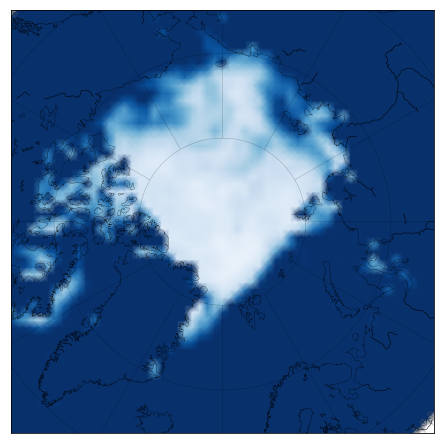

In [26]:
# Import Python libraries
%matplotlib inline

import argparse # for passing variables from bash
import sys
sys.path.append('../')
import forecast_funcs as ff
from pylab import *
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import griddata

# File paths
datapath = '../../Data/'
rawdatapath='../../Data/'
dataoutpath='../../DataOutput/IceConcA/'
figpath='../../Figures/Arctic/IceConc/'

# Get map projection and create regularly spaced grid from this projection
m = Basemap(projection='npstere',boundinglat=65,lon_0=0, resolution='l'  )
dx_res = 100000.
grid_str=str(int(dx_res/1000))+'km'
poleStr='A'

concVersion='' # Gridded conc version string (default empty)
hemStr='N' # Hemipshere (N or S)
yearsT=2016 # Year
fmonth=6 #6=June, 9=Sep #  Forecast month

xptsG, yptsG, iceConcG = ff.get_conc_gridded(dataoutpath, yearsT, fmonth, hemStr, concVersion=concVersion)

fig = figure(figsize=(6,6))
ax1=gca()

im1 = m.pcolormesh(xptsG , yptsG, iceConcG, cmap=cm.Blues_r, vmin=0, vmax=1,shading='gouraud', zorder=2)

m.drawcoastlines(linewidth=0.25, zorder=5)
m.drawparallels(np.arange(90,-90,-10), linewidth = 0.25, zorder=3)
m.drawmeridians(np.arange(-180.,180.,30.), linewidth = 0.25, zorder=3)
m.fillcontinents(color='0.8',lake_color='0.7', zorder=2)

subplots_adjust( right = 0.99, left = 0.01, top=0.99, bottom=0.01)
plt.show()


In [18]:
xptsG.shape

(57, 57)

In [17]:
lonsG, latsG = m(xpts, ypts, inverse=True)

lonsG.dump(dataoutpath+'lons'+grid_str+poleStr)
latsG.dump(dataoutpath+'lats'+grid_str+poleStr)

In [25]:
conc_nc = Dataset(dataoutpath+'iceConc'+grid_str+str(fmonth)+poleStr+'.nc','w',format='NETCDF4_CLASSIC')
x = conc_nc.createDimension('x', 57)
y = conc_nc.createDimension('y', 57)
latitude = conc_nc.createVariable('latitude', np.float32,('x','y'))
longitude = conc_nc.createVariable('longitude', np.float32,('x','y'))
concentration = conc_nc.createVariable('concentration', np.float32,('x','y'))

latitude[:]=latsG
longitude[:]=lonsG
concentration[:]=iceConcG


conc_nc.description = 'NASA Team ice concentration data re-gridded to 100 km polar stereographic'
conc_nc.history = 'Created ' + time.ctime(time.time())
conc_nc.source = 'Alek Petty'
conc_nc.close()
